<a href="https://colab.research.google.com/github/Sinha123456/udacity_lesson_project/blob/main/Copy_of_No_show_appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project details and working platform:**
## No show appointment project is done by google colab platform.
## For this project data is provided by the kaggle. 
## This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Data set contains 110527 rows and 14 columns.
In this data set, we need to explore whether patients show up on their appointment or not based on their health conditions, neighbhourhood, day/time, scholarship and confirmed sms recieved. 


Project's questions:

Q. A statement of the question(s) you posed?

Ans: In the dataset, Age column has unusal values, that was difficult for me, I also used wrong code, and all rows converted in the mean of Age values. 
I was trying to plot all disease columns in one plot, that would classified patients with disease to show up or not show up on their appointment. I tried many ways, then I asked question to mentor. That was helpful.

Q.A description of what you did to investigate those questions?

Ans: I relate input variablet to output variable, to see better visualization between these correlated variables, I used univariate, bivariate and multivariate plot with target variable.

**Data wranling investigation:**
There are no null values and duplicated attributes in the dataset. There are 110527 rows and 14 columns in the dataset.
. ScheduledDay and AppointmentDay columns are in string, need to be parse in date time columns.In the age column mean age is 37, min age 0, and max age 115, unusal age is -1, need to investigate more about the age column. Very few patients are Alcoholism and Handicap.

# **Data Cleaning**

* dropping unneccessary columns
* parsing date columns: ScheduledDay and AppointmentDay
* Encoding No show column
* Extract string from ScheduledDay and AppointmentDay
* Add date, day, and time columns
* Converting columns in lowercase


**Exploratory Data Analysis**
In No_show data exploration  find the relationship between dependent and  independent variable. That would help to analize which attributes are closely related to independent variable. 
Age, Gender, and disease columns are closely related to patients who show/not show for their appointment. For the data exploration, used barplot, histogram,countplot.

# Mounted drive
Data can be access from drive to colab notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Import packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

Loding a data, using pandas read function.
Reading few lines.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/udacity_projects/noshowappointments-kagglev2-may-2016(1).csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Data Wrangling

In [ ]:
#check the null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
#check unique values in the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [ ]:
#check duplicate values
df.duplicated().sum()

0

In [ ]:
#check the shape of data
df.shape

(110527, 14)

converting dataframe columns in lowercase

In [ ]:
df['PatientId'].duplicated().sum()

48228

In [ ]:
df.columns.str.lower()

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [ ]:
#Renaming the column name
df.rename(columns = {'No-show': 'No_show'}, inplace=True)

In No_show column, there are two values 'No' and 'Yes'. In that dataset No means people they showed up on their appoinment and Yes means people didn't show up, however, converting yes/no in right format.

In [ ]:
df['No_show'] = np.where((df['No_show']== 'Yes'), 'No', 'Yes' )

Convert PatientId(scientific notion) to int, check the column and datatype. 

In [ ]:
df['PatientId'] = df['PatientId'].apply(lambda x : '%.0f' %x).astype(int)

In [ ]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No_show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


Before doing more cleaning, need to be visualize all attributes
that would help to see outliers and skew status in the plot.

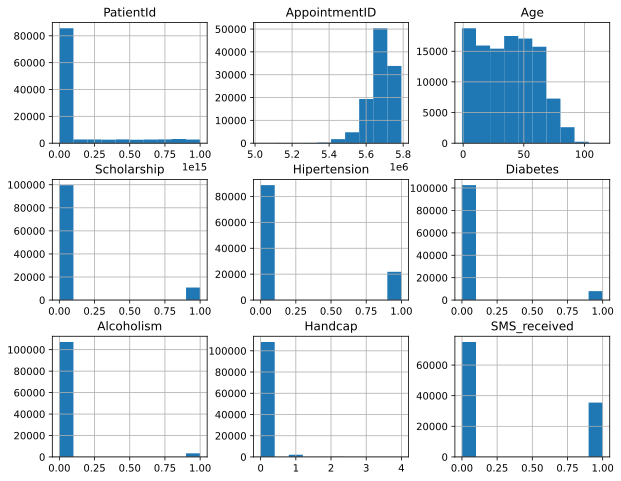

In [ ]:
df.hist(figsize = (10,8))
plt.show()

In the above plot showing that Age column is more skewed to the left.
columns are in boolean fromat: 1 is True and 0 is False
Only few people have a scholarship.
Maximum people do not have Diabetes, Alcoholism and handcap: 
Most of the people get 0 messages for their appointments, 



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


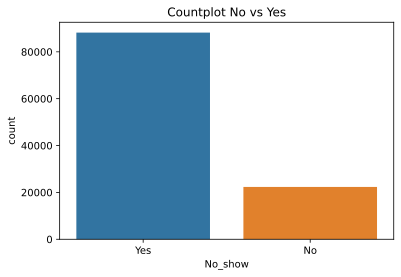

In [ ]:
sns.countplot('No_show', data = df)
plt.title("Countplot No vs Yes")
plt.show()


Only 20000 patients didn;t show on their appointment. 80000 patients to show up in the hospital.

In [ ]:
df.groupby('No_show')['Age'].value_counts()

No_show  Age 
No        0      639
          1      415
          17     396
          19     394
          30     369
                ... 
Yes       100      4
          102      2
          115      2
         -1        1
          99       1
Name: Age, Length: 204, dtype: int64

In [ ]:
df.query('Age <= 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
59,71844284745331,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,Yes
63,236623344873175,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,Yes
64,188517384712787,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,Yes
65,271881817799985,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,Yes
67,86471282513499,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,147395196662956,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,Yes
110346,5577525313231,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,Yes
110454,614245995575,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,Yes
110460,43218463343323,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,Yes


In [ ]:
df.query('Age ==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,Yes


In [ ]:
df.loc[(df.Age == -1),'Age']=df['Age'].mean()

In the Age column lots of 0 values and one value is -1. From the mentor help page got help to deal with it.

In [ ]:
df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [ ]:
#converting object to datetime datatype and check the datatypes.
columns = ['ScheduledDay', 'AppointmentDay']
for i in columns:
  df[i] =  pd.to_datetime(df[i])
df.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No_show                        object
dtype: object

Converting appointmentday and scheduleday to datetime columns,
make seprate columns 'Day' and 'Time' for these two columns.

In [ ]:
#extractime time from the scheduleday.
df['Appt_Time'] = df['ScheduledDay'].dt.time
df['Appt_Time'].head(2)

0    18:38:08
1    16:08:27
Name: Appt_Time, dtype: object

In [ ]:
#extracting day from the datetime column.
df['Sch_Day'] = df['ScheduledDay'].dt.day_name() 
df['Appt_Day'] = df['AppointmentDay'].dt.day_name()
df[['Sch_Day', 'Appt_Day']].head(2)

,Sch_Day,Appt_Day
0,Friday,Friday
1,Friday,Friday


In [ ]:
disease= ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']  #converting float to int of disease columns
for i in disease:
  df[i] = df[i].astype(int)

In [ ]:
df.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No_show                        object
Appt_Time                      object
Sch_Day                        object
Appt_Day                       object
dtype: object

In [ ]:
#encoding no_show column
df['no_show'] = df['No_show'].map({'Yes': 1, 'No': 0}).astype(int) 


In [ ]:
#converting float to int age, scholarship and sms_recieved columns
columns = ['Age', 'Scholarship', 'SMS_received']
def change_dtype(columns):
  for i in columns:
    df[i] = df[i].astype(int)
change_dtype(columns)

In [ ]:
df.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No_show                        object
Appt_Time                      object
Sch_Day                        object
Appt_Day                       object
no_show                         int64
dtype: object

**Exploratory Data Analysis**

Text(0.5, 1.0, 'Attributes correlations by heatmap')

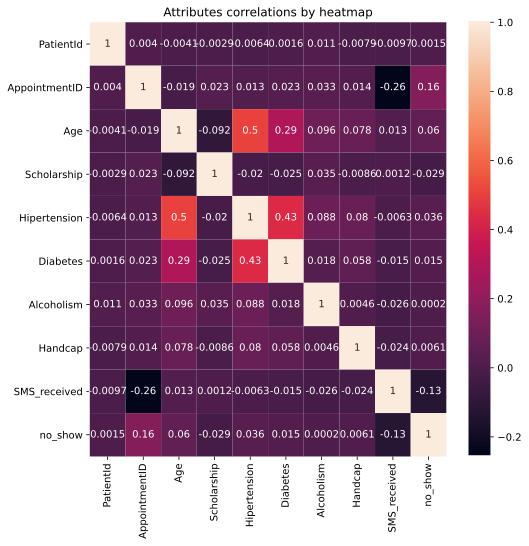

In [ ]:
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.title('Attributes correlations by heatmap')

Positive correlated variables are age and hipertension, diabetes and hipertension, other attributes are slightly positive correlated. Age between PatientId, appointmentId are negativly correlated.

In [ ]:
pd.value_counts(df['No_show'])

Yes    88208
No     22319
Name: No_show, dtype: int64

88208 patients who visited to the hospitals, and 22319 patients didn't visit to their appointment.

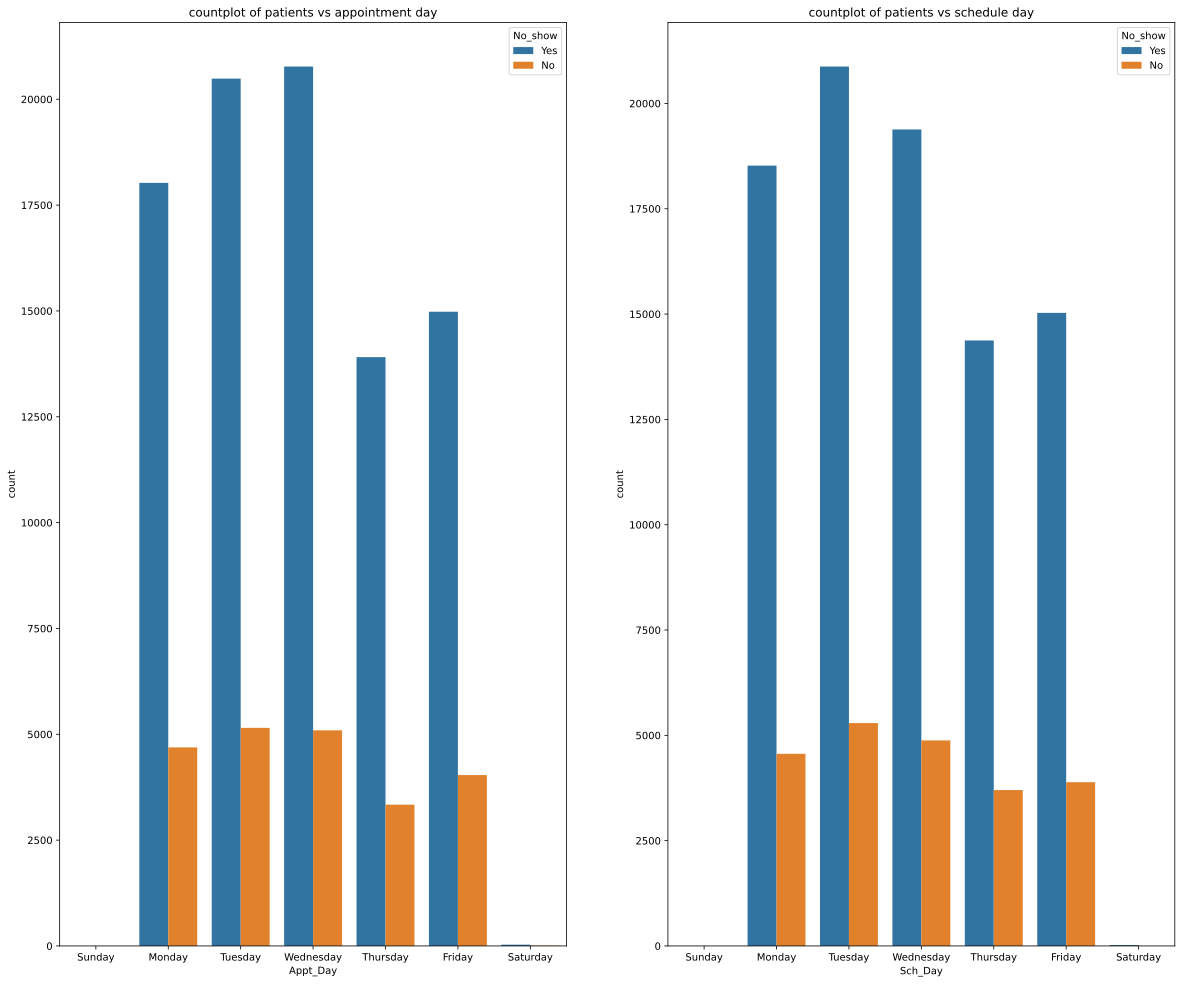

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,17), dpi = 200)
sns.countplot(x = df['Appt_Day'], hue = 'No_show', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday'], data = df, ax = ax[0])
sns.countplot(x = df['Sch_Day'], hue = 'No_show', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday'], data = df, ax = ax[1])
ax[0].set_title("countplot of patients vs appointment day")
ax[1].set_title("countplot of patients vs schedule day")
fig.show()

Countplot shows, around 21000 patients made appointment on Tuesdays and Wednesdays, 5000 patients did not make appointment on these days.Around 13000 patients make appointment on Thursdays.
Around 22000 patients got schedule on Tuesdays, Around 2200 patients did not have schedule on Thursdays, There is no Appointment and Schedule on Saturdays and Sundays.

Text(0.5, 1.0, 'Countplot of Gender vs No show(Yes/No) appointment')

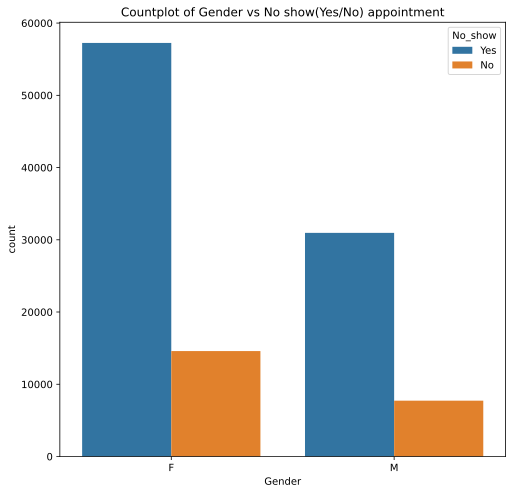

In [ ]:
#showing count vlaues of male and female, those who show up/not show up their appointment.
plt.figure(figsize=(8,8))
sns.countplot(x = df['Gender'], hue='No_show', data = df)
plt.title('Countplot of Gender vs No show(Yes/No) appointment')


In [ ]:
#count total gender values.
total_gender = df['Gender'].value_counts().sum()
total_gender

110527

In [ ]:
#count total male and female.
female = df.query('Gender == "F"').value_counts().sum()
male = df.query('Gender == "M"').value_counts().sum()
female,male

(71840, 38687)

In [ ]:
#finding proprtion of male/female.
prop_female = female/total_gender
prop_male = male/total_gender
prop_female, prop_male

(0.6499769287142508, 0.35002307128574917)

Text(0.5, 1.0, 'Gender proportion of patients')

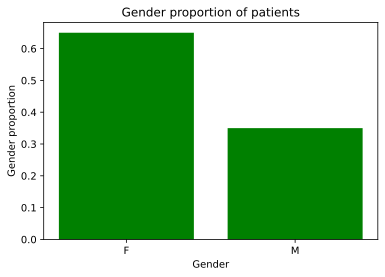

In [ ]:
#plotting proportion of male/female.
plt.bar(["F", "M"], [prop_female,prop_male], color = 'g')
plt.xlabel('Gender')
plt.ylabel('Gender proportion')
plt.title('Gender proportion of patients')

In the dataset,females values are almost double to male values. 
In the countplot, 58000 females and 30000 male showed up on their appointment/schedule day, while 16000 females and 9000 males missed their appointment/schedule date.

Text(0.5, 1.0, 'Bar plot of average age vs showing appointment(Yes/NO)')

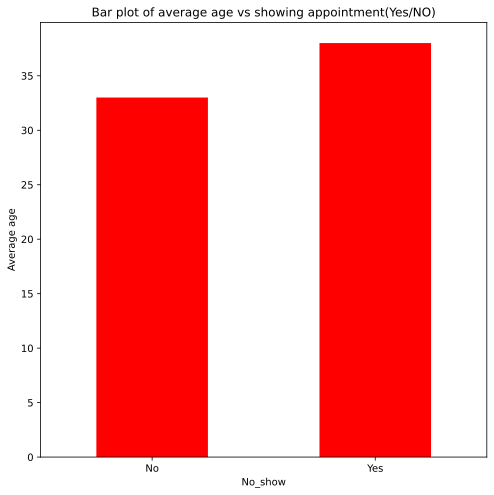

In [ ]:
#plotting graph of Age vs show up/not show up.
plt.figure(figsize =(8,8))
df.groupby('No_show')['Age'].median().plot(kind = 'bar', color = 'red', rot = 0)
plt.ylabel('Average age')
plt.title('Bar plot of average age vs showing appointment(Yes/NO)')

In bar plot of average age vs showing appointment(Yes/NO), 
average age is 37.8874, patients who are on average age, they showed up on their appointment, below average age didn't show up.

In [ ]:
# in boolean type to show up/ not show up.
show_up = df.No_show == True
notshow_up = df.No_show == False

In [ ]:
#count handicap patients
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In the handicap column, there are 2,3 and 4 values are unusal, converting them into 0 because mode of Handicap is 0, so visualization would be easy.

In [ ]:
df['Handcap'] = np.where((df.Handcap > 1), 0, df.Handcap)


In [ ]:
#check the values to convert all in 0s and 1s.
df['Handcap'].value_counts()

0    108485
1      2042
Name: Handcap, dtype: int64

In [ ]:
df.groupby('No_show')[disease].sum()

,Hipertension,Diabetes,Alcoholism,Handcap
No_show,,,,
No,3772,1430,677,366
Yes,18029,6513,2683,1676


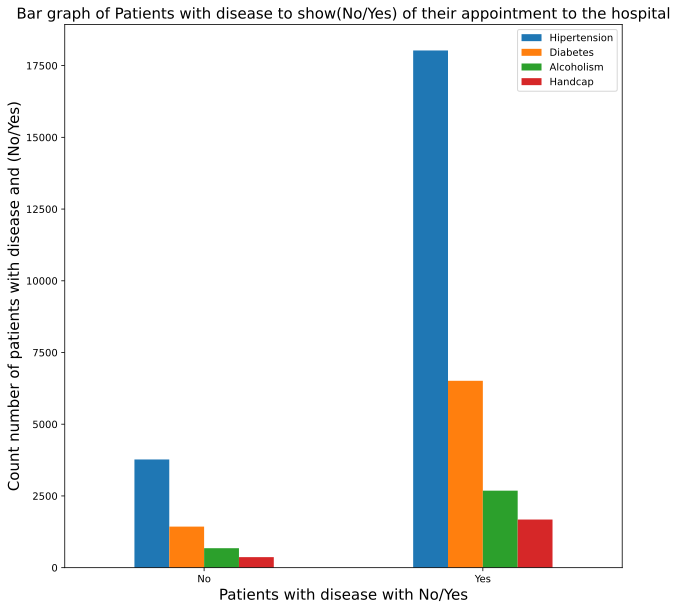

In [ ]:
#plotting all patients who are with disease, those who show up/ not showto their appointment.
df.groupby('No_show')[disease].sum().plot(kind = 'bar', figsize = (10,10))
plt.xlabel('Patients with disease with No/Yes', {'fontsize':15})
plt.ylabel('Count number of patients with disease and (No/Yes)', {'fontsize':15})
plt.title('Bar graph of Patients with disease to show(No/Yes) of their appointment to the hospital', {'fontsize': 15})
plt.xticks(rotation = 0)
plt.show()

Maximum patients with hipertension kept their appointment.very few handicap patients didn't show up of their appointment.Alcoholism and handicap patients are less then diabetes and heipertension. From the graph we can see more then half of these patients missed their appointment.

In [ ]:
#Patients who recieved sms.
sms_received = df.query('SMS_received == 1')
sms_received.count()

PatientId         35482
AppointmentID     35482
Gender            35482
ScheduledDay      35482
AppointmentDay    35482
Age               35482
Neighbourhood     35482
Scholarship       35482
Hipertension      35482
Diabetes          35482
Alcoholism        35482
Handcap           35482
SMS_received      35482
No_show           35482
Appt_Time         35482
Sch_Day           35482
Appt_Day          35482
no_show           35482
dtype: int64

In [ ]:
#Patients who didn't recieve sms
sms_notreceived = df.query('SMS_received == 0')
sms_notreceived.count()

PatientId         75045
AppointmentID     75045
Gender            75045
ScheduledDay      75045
AppointmentDay    75045
Age               75045
Neighbourhood     75045
Scholarship       75045
Hipertension      75045
Diabetes          75045
Alcoholism        75045
Handcap           75045
SMS_received      75045
No_show           75045
Appt_Time         75045
Sch_Day           75045
Appt_Day          75045
no_show           75045
dtype: int64

35482 patients recieved sms while 75045 patients didn't recieve sms.

In [ ]:
#count patients who recive sms and show/not show to their appointment.
df.groupby('No_show')['SMS_received'].count()

No_show
No     22319
Yes    88208
Name: SMS_received, dtype: int64

88208 patients show up to their appointment those are also recieved sms.
22319 patients didn't show up to their appointment as well as not recieve sms. 

In [ ]:
#counting total patients who got the scholarship
scholar = df.groupby('Scholarship')['no_show'].count().reset_index(name = 'Count').sort_values('Count')
scholar

,Scholarship,Count
1,1,10861
0,0,99666


10861 patients got the scholarship while 99666 didn't have scholarship.

In [ ]:
#counting patients with scholarship those who show up on their appointment.
show = df.query('no_show == 1')
no_show = df.query('no_show == 0')
scholar_show = show.groupby('Scholarship')['no_show'].count().reset_index(name = "Count").sort_values("Count")
scholar_show

,Scholarship,Count
1,1,8283
0,0,79925


8283 patients who have scholarship while 79925 patients don't have a scholarship, they show up on their appointment

In [ ]:
scholar_noshow = no_show.groupby('Scholarship')['no_show'].count().reset_index(name = 'Count').sort_values('Count')
scholar_noshow

,Scholarship,Count
1,1,2578
0,0,19741


2578 patients who have a scholarship snd 19741 don't have a scholarship, they did'nt show up on their appointment

**Conclusion**:
No_show_appointment dataset is used for analysis.
Analysing topic was what kind of patients show up/ not_show_up on their appointments to the hospital based on diffrent attributes.
Dataset didn't need  much wrangling, it was cleaned. 

Changed column name, encoding, fill unusal values with mean of the column,
changed column string to datetime.
Variable was Hipertension, diabetese posively correlated with target variable. Other variables are slightly posive correlated.
Average age patients and 80% of female show up on their appointment. While male portion was very less to keeping their appointment. 
Hipertension's patients actively showup on their appointment while, few handicap patients didn't show up to the hospital.  

Histogram, barplot, countplot used for visual analyzing.


**Limitations**
There are many aspects to find out the problem of patients not showing up to their appointments. our data is sufficient for analyisng and there is no missing values except in the age column, there is a one unusual value, that would not effect to analysis of that dataset. However, othe aspects might effect analyises. Just like, If we think about patients who have disease, they would not miss their appointment unless they would not get confirmed message, lack of transportation(everyone don't drive, could not be public transport on appointment day, personal issue). In our dataset most of the patients who have disease they show up that means they didn't have that problems. In the dataset, their are 48228 duplicates of patientsId that means 24114 patients registered for two times that could effect on analysis. There is a lack of informations about the patients for example,why they missed their appointment? do they don't get confirmation of their appointment? severe health issue, can't go by oneself, didn't get abulance on right time? work emergency or personal issue at home;these possibilities could be effect on them to not showing up to hospitals. There could be reason from hospital side to for example,
Hospital didn't send confirmations to all patients, misunderstanding between patients and hospitals about their appointment on certain day, maybe lack of data correction, lack of staff or particular doctor was not in the hospital, when patients have appointment with these particular doctors. All these information might help for insightful findings.

In [ ]:
#code for downloading pdf format
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('No_show_appointment.ipynb')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('No_show_appointment.ipynb')

In [ ]:
#first download ipynb file then upload same file
!jupyter nbconvert --to html format Copy_of_No_show_appointment.ipynb

[NbConvertApp] WARNING | pattern u'format' matched no files
[NbConvertApp] Converting notebook Copy_of_No_show_appointment.ipynb to html
[NbConvertApp] Writing 812542 bytes to Copy_of_No_show_appointment.html
